In [2]:
#nc 2 matplotlib demo
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

In [50]:
ds=xr.open_dataset('VT.nc')
vname=list(ds.keys())
ds=ds.mean(dim='lon')
da=ds[vname].to_array()[0]
x=da.values
lev=da.lev.values
lat=da.lat.values

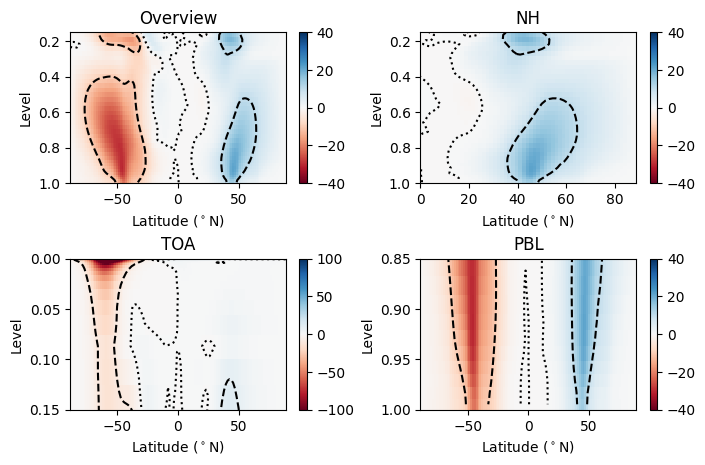

In [109]:
fig, axs = plt.subplots(2, 2, dpi=100, figsize=(8,5))
plt.subplots_adjust(hspace=0.5,wspace=0.3)

sps=[
    {'axn':0, 'title':'Overview', 'xr':(lat[0],lat[-1]), 'yr': (1, 0.15), 'clim':(-40,40)},
    {'axn':1, 'title':'NH'      , 'xr':(0,lat[-1]),      'yr': (1, 0.15), 'clim':(-40,40)},
    {'axn':2, 'title':'TOA'     , 'xr':(lat[0],lat[-1]), 'yr': (0.15, 0), 'clim':(-100,100)},
    {'axn':3, 'title':'PBL'     , 'xr':(lat[0],lat[-1]), 'yr': (1, .85), 'clim':(-40,40)},
]

def plot_contour(sp):
    ax=axs.flat[sp['axn']]
    im=ax.pcolormesh(lat,lev,x,shading='auto')
    im.set_clim(sp['clim'])
    im.set_cmap('RdBu')
    ax.set_ylim(sp['yr'])
    ax.set_xlim(sp['xr'])
    ax.contour(lat,lev,x,[0],colors='k',linestyles=':')
    ax.contour(lat,lev,x,[-10, 10],colors='k',linestyles='--')
    ax.set_ylabel('Level')
    ax.set_xlabel('Latitude ($^\circ$N)');
    ax.set_title(sp['title'])
    plt.colorbar(im,ax=ax)
    
for sp in sps:
    plot_contour(sp)
    


